<br>
<br>
 <center> <font size = "5">Client Post Request  </font></center>
 <br>
 <center> <font size = "4"> API Functions - Forecasting
 </font></center>
 <br>
 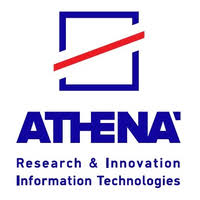
<br>
<br>

---

### Imports

In [5]:
import json
import pandas as pd
from datetime import datetime
from bokeh.plotting import figure, show
from bokeh.layouts import layout
from bokeh.io import output_notebook
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
import numpy as np
from itertools import combinations
import requests
import logging
from random import random
import seaborn as sn

### API 'correlate()' call example using custom data

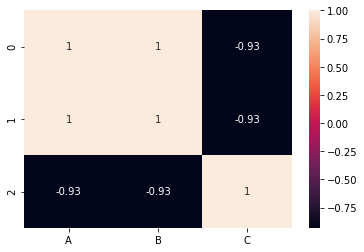

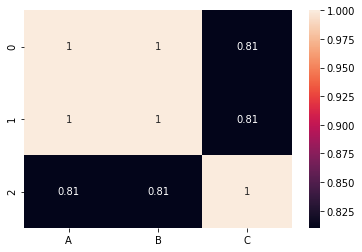

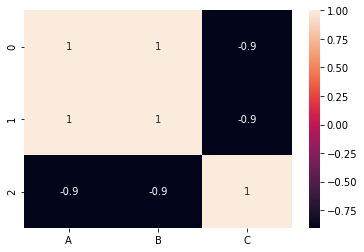

In [12]:
# Create Data
# -----------
time_series_1 = [i*2 for i in range(1,31)]
time_series_2 = [i*3 for i in range(1,31)]
time_series_3 = [random() for i in range(1,31)]

data = [time_series_1,time_series_2,time_series_3]


# API call
# -------
url = 'http://sdl-ts.magellan2.imsi.athenarc.gr/time_series/correlate'

payload = dict(data=data, start=0, window_size=3, step_size=3 ,steps=3 ,correlation_method='pearson', locale='None',api_key = 'ggDweN7Hcl')
data = payload

res = requests.post(url, json = data)


# Results Visualisation
# --------------------
data = res.json()

data = data['correlations']

for i in range(0,len(data)):
    pd.DataFrame(data[i])
    sn.heatmap(pd.DataFrame(data[i],columns=['A','B','C']), annot=True)
    plt.show()

### API 'correlate()' call example using sftp data

In [13]:
# Call catalog to see the available data on the sftp
# --------------------------------------------------

url = 'http://sdl-ts.magellan2.imsi.athenarc.gr/time_series/catalog'

res = requests.get(url)
print(res.text)

{
 "available data": [
  "EU- Corn Future_0011B1.txt",
  "EU- Milling Wheat Future_0011B2.txt",
  "EU- Rapeseed Future_0011B3.txt",
  "GB- Brent Crude Oil-Future_000722.txt",
  "GB- Cocoa (C) Future GBp-t_001062.txt",
  "GB- Robusta Coffee Fut. (409)_001071.txt"
 ]
}



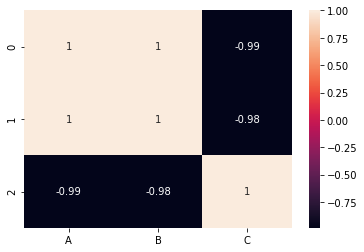

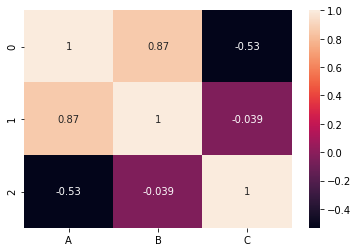

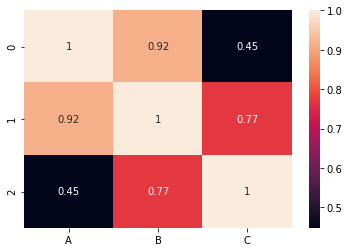

In [15]:
# Select data
# -----------

data = ["EU- Corn Future_0011B1.txt", "EU- Milling Wheat Future_0011B2.txt","GB- Robusta Coffee Fut. (409)_001071.txt"]


# API call
# -------
url = 'http://sdl-ts.magellan2.imsi.athenarc.gr/time_series/correlate'

payload = dict(data=data, start=0, window_size=3, step_size=100 ,steps=3 ,correlation_method='pearson', locale='None',api_key = 'ggDweN7Hcl')
data = payload

res = requests.post(url, json = data)


# Results Visualisation
# --------------------
data = res.json()

data = data['correlations']

for i in range(0,len(data)):
    pd.DataFrame(data[i])
    sn.heatmap(pd.DataFrame(data[i],columns=['A','B','C']), annot=True)
    plt.show()